In [4]:
# Imports
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import estimate_bandwidth ,MeanShift
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


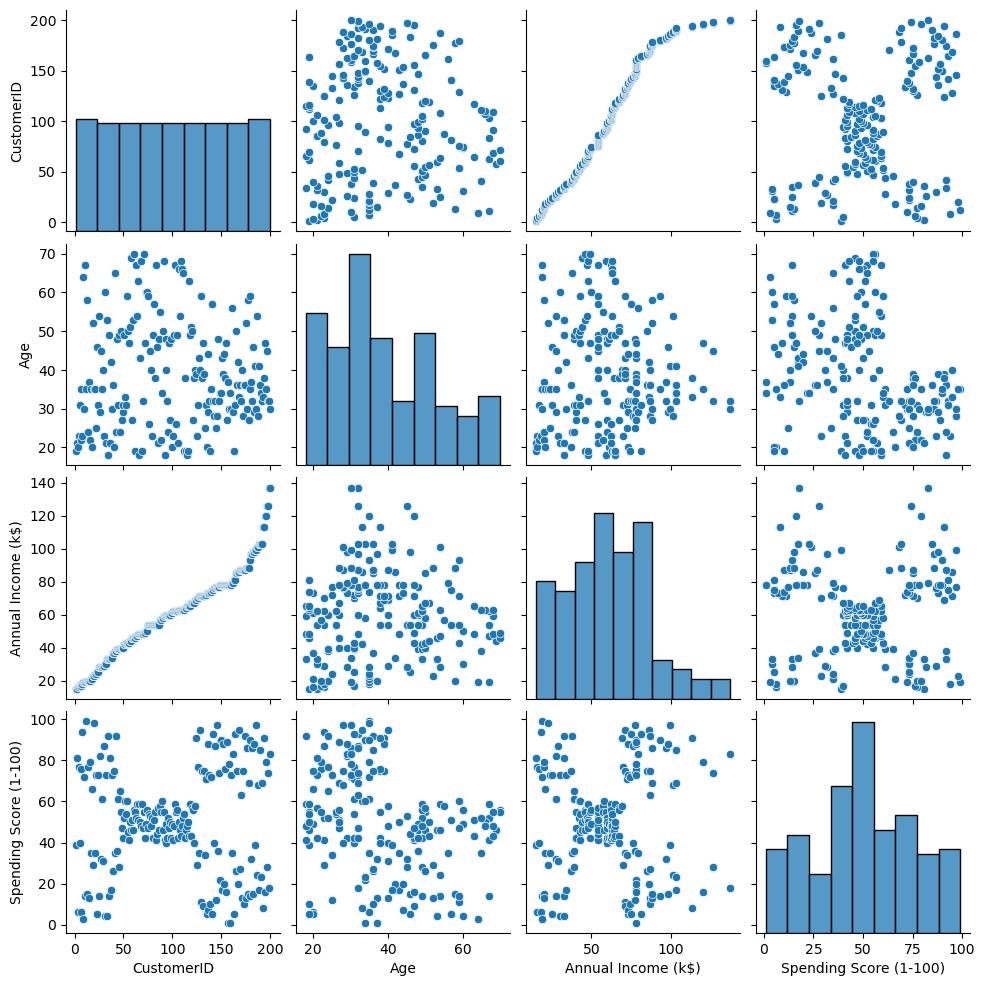

In [7]:
sns.pairplot(df)

In [8]:
df.drop('CustomerID',axis=1,inplace=True)

In [9]:
data = df.iloc[:,[2,3]].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
bandwidth = estimate_bandwidth(data,quantile=0.2,n_samples=1000)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(data)

MeanShift(bandwidth=27.161411938994306)

In [11]:
labels = meanshift.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [12]:
uniques = np.unique(labels)
len(uniques)

3

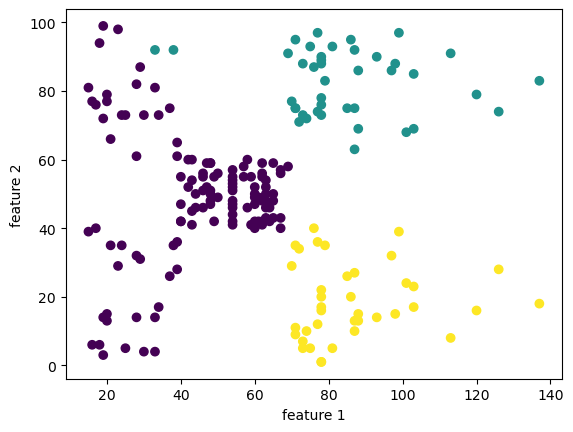

In [13]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap="viridis")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [14]:
clusters = [[27,72],[36,90],[9,81]]
x,target = make_blobs(n_samples=1000,centers=clusters,cluster_std=2.79)
x

array([[35.00141097, 90.48869676],
       [10.52473275, 76.73405824],
       [13.00982983, 82.08103205],
       ...,
       [39.3483267 , 87.29274333],
       [29.37028363, 75.0977496 ],
       [36.15319681, 85.24208372]])

In [15]:
bandwidth = estimate_bandwidth(x,quantile=0.2,n_samples=1000)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(x)

MeanShift(bandwidth=5.367490483519869)

In [16]:
labels = meanshift.labels_
uniques = np.unique(labels)
len(uniques)

3

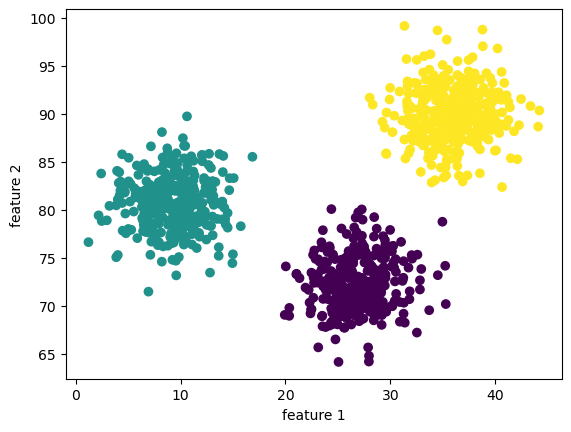

In [17]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap="viridis")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()